In [8]:
!pip install pulp
import pandas as pd
from pulp import *


In [14]:
from google.colab import files
uploaded = files.upload()


Saving Demo_DLS.xlsx to Demo_DLS (2).xlsx


In [15]:
import pandas as pd
df = pd.read_excel("Demo_DLS (2).xlsx")

print("First 5 rows")
display(df.head())
print("Last 5 rows")
display(df.tail())


First 5 rows


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Num,Name,Position,Overall,SPE,ACC,STA,STR,CON,PAS,SHO,TAC,Total,Point,Rank,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rank,Quantity
1,1.0,David De Gea,GK,91.0,65.0,66.0,85.0,71.0,51.0,50.0,93.0,63.0,544.0,87.741935,A,NaN,NaN,89+,S,15
2,2.0,Kyle Walker,RB,90.0,100.0,100.0,80.0,95.0,83.0,80.0,52.0,82.0,672.0,84.000000,B,NaN,NaN,87-89,A,9
3,3.0,Ancraf Hakimi,RB,92.0,100.0,100.0,89.0,88.0,87.0,78.0,81.0,78.0,701.0,87.625000,A,NaN,NaN,83-87,B,15
4,4.0,Virgil Van Dijk,CB,95.0,100.0,86.0,100.0,100.0,81.0,88.0,63.0,100.0,718.0,89.750000,S,NaN,NaN,80-83,C,6


Last 5 rows


,Num,Name,Position,Overall,SPE,ACC,STA,STR,CON,PAS,SHO,TAC,Total,Point,Rank,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
49,80.0,Bruno Fernandes,AM,94.0,88.0,100.0,100.0,87.0,92.0,99.0,89.0,74.0,729.0,91.125000,S,NaN,NaN,NaN,NaN,NaN
50,82.0,Edin Dzeko,CF,88.0,91.0,85.0,87.0,91.0,91.0,90.0,71.0,52.0,658.0,82.250000,C,NaN,NaN,NaN,NaN,NaN
51,88.0,Antony,RW,85.0,100.0,96.0,89.0,68.0,89.0,77.0,75.0,47.0,641.0,80.125000,C,NaN,NaN,NaN,NaN,NaN
52,95.0,Jeese Lingard,AM,86.0,92.0,83.0,65.0,75.0,87.0,86.0,82.0,68.0,638.0,79.750000,D,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,Average,92.5,76.5,83.0,92.5,79.0,71.5,74.5,91.0,68.5,636.5,89.433468,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Xóa tất cả các cột có chữ "Unnamed"
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

print(df.columns)
display(df.head())
# Xóa tất cả các cột có chữ "Unnamed"
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

print(df.columns)
display(df.head())


Index(['Num', 'Name', 'Position', 'Overall', 'SPE', 'ACC', 'STA', 'STR', 'CON',
       'PAS', 'SHO', 'TAC', 'Total', 'Point', 'Rank'],
      dtype='object')


,Num,Name,Position,Overall,SPE,ACC,STA,STR,CON,PAS,SHO,TAC,Total,Point,Rank
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,David De Gea,GK,91.0,65.0,66.0,85.0,71.0,51.0,50.0,93.0,63.0,544.0,87.741935,A
2,2.0,Kyle Walker,RB,90.0,100.0,100.0,80.0,95.0,83.0,80.0,52.0,82.0,672.0,84.000000,B
3,3.0,Ancraf Hakimi,RB,92.0,100.0,100.0,89.0,88.0,87.0,78.0,81.0,78.0,701.0,87.625000,A
4,4.0,Virgil Van Dijk,CB,95.0,100.0,86.0,100.0,100.0,81.0,88.0,63.0,100.0,718.0,89.750000,S


Index(['Num', 'Name', 'Position', 'Overall', 'SPE', 'ACC', 'STA', 'STR', 'CON',
       'PAS', 'SHO', 'TAC', 'Total', 'Point', 'Rank'],
      dtype='object')


,Num,Name,Position,Overall,SPE,ACC,STA,STR,CON,PAS,SHO,TAC,Total,Point,Rank
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,David De Gea,GK,91.0,65.0,66.0,85.0,71.0,51.0,50.0,93.0,63.0,544.0,87.741935,A
2,2.0,Kyle Walker,RB,90.0,100.0,100.0,80.0,95.0,83.0,80.0,52.0,82.0,672.0,84.000000,B
3,3.0,Ancraf Hakimi,RB,92.0,100.0,100.0,89.0,88.0,87.0,78.0,81.0,78.0,701.0,87.625000,A
4,4.0,Virgil Van Dijk,CB,95.0,100.0,86.0,100.0,100.0,81.0,88.0,63.0,100.0,718.0,89.750000,S


In [19]:
df_clean = df[df["Name"].notna() & df["Position"].notna()]
total_players = len(df_clean)

print("Tổng số cầu thủ:", total_players)


Tổng số cầu thủ: 52


In [21]:
positions = [
    "GK", "CB", "RB", "LB", "LWB", "RWB",
    "CM", "CDM", "AM", "LM", "RM",
    "SS", "CF", "LW", "RW"
]

print(" Players by Position:")
print("-" * 60)

for pos in positions:
    cnt = (df["Position"] == pos).sum()
    print(f"{pos:<4}: {cnt}")


 Players by Position:
------------------------------------------------------------
GK  : 3
CB  : 9
RB  : 5
LB  : 2
LWB : 0
RWB : 0
CM  : 3
CDM : 0
AM  : 6
LM  : 0
RM  : 1
SS  : 0
CF  : 6
LW  : 9
RW  : 5


In [25]:
ranks = ["S", "A", "B", "C", "D"]

print("\nPlayers by Rank (S / A / B / C / D):")
print("-" * 60)

for r in ranks:
    cnt = (df["Rank"] == r).sum()
    print(f"Rank {r:<2}: {cnt}")



Players by Rank (S / A / B / C / D):
------------------------------------------------------------
Rank S : 15
Rank A : 9
Rank B : 15
Rank C : 6
Rank D : 7


In [26]:
summary = {
    "Total_Players": [total_players],
}

# Add position stats
for pos in positions:
    summary[pos] = [(df["Position"] == pos).sum()]

# Add rank stats
for r in ranks:
    summary[f"Rank_{r}"] = [(df["Rank"] == r).sum()]

summary_df = pd.DataFrame(summary)

print("\n📊 Summary table:")
display(summary_df)


📊 Summary table:


,Total_Players,GK,CB,RB,LB,LWB,RWB,CM,CDM,AM,...,RM,SS,CF,LW,RW,Rank_S,Rank_A,Rank_B,Rank_C,Rank_D
0,52,3,9,5,2,0,0,3,0,6,...,1,0,6,9,5,15,9,15,6,7


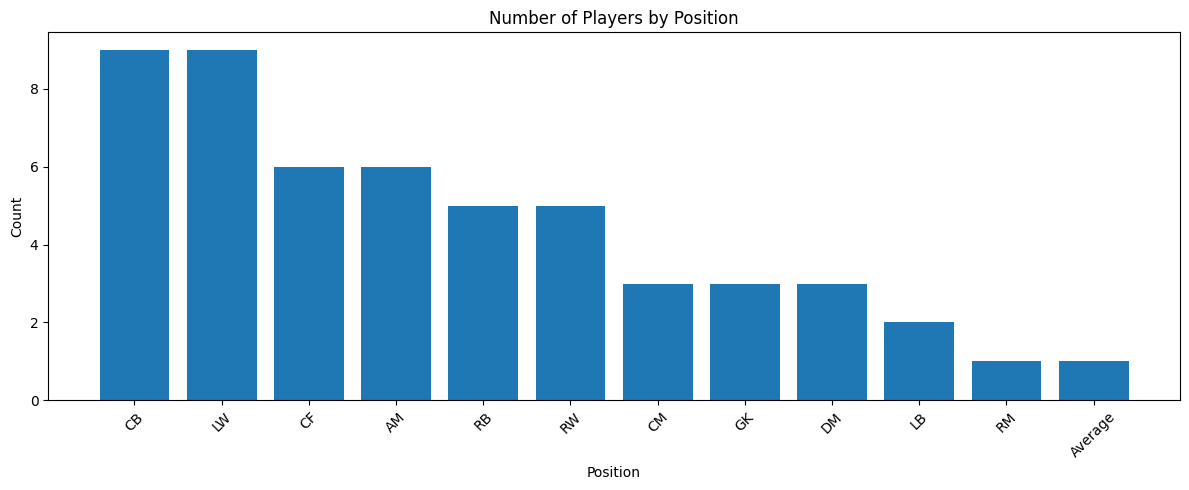

In [31]:
import matplotlib.pyplot as plt

# Count players per Position
pos_counts = df["Position"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(pos_counts.index, pos_counts.values)
plt.title("Number of Players by Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


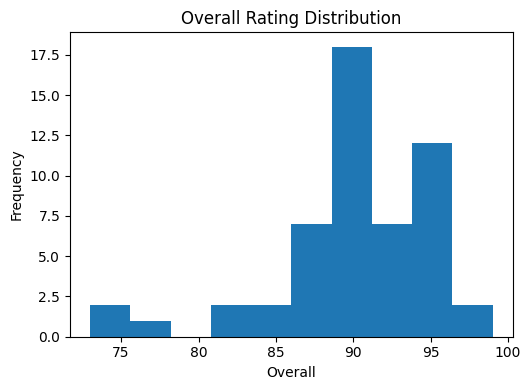

In [30]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df["Overall"], bins=10)
plt.title("Overall Rating Distribution")
plt.xlabel("Overall")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [36]:
import pandas as pd
from pulp import *

df = pd.read_excel("Demo_DLS (2).xlsx")

# Clean rows
df = df[df["Name"].notna() & df["Position"].notna()].reset_index(drop=True)

# Drop Unnamed columns
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Strip spaces in column names (VERY IMPORTANT)
df.columns = df.columns.str.strip()

print("Columns:", df.columns.tolist())
display(df.head())


Columns: ['Num', 'Name', 'Position', 'Overall', 'SPE', 'ACC', 'STA', 'STR', 'CON', 'PAS', 'SHO', 'TAC', 'Total', 'Point', 'Rank']


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Num,Name,Position,Overall,SPE,ACC,STA,STR,CON,PAS,SHO,TAC,Total,Point,Rank
0,1.0,David De Gea,GK,91.0,65.0,66.0,85.0,71.0,51.0,50.0,93.0,63.0,544.0,87.741935,A
1,2.0,Kyle Walker,RB,90.0,100.0,100.0,80.0,95.0,83.0,80.0,52.0,82.0,672.0,84.000000,B
2,3.0,Ancraf Hakimi,RB,92.0,100.0,100.0,89.0,88.0,87.0,78.0,81.0,78.0,701.0,87.625000,A
3,4.0,Virgil Van Dijk,CB,95.0,100.0,86.0,100.0,100.0,81.0,88.0,63.0,100.0,718.0,89.750000,S
4,5.0,Raphael Varane,CB,91.0,99.0,90.0,88.0,97.0,78.0,84.0,63.0,93.0,692.0,86.500000,B


In [37]:
# Choose which column to maximize
score_col = None
if "Point" in df.columns:
    score_col = "Point"
elif "Overall" in df.columns:
    score_col = "Overall"
else:
    raise ValueError(f"No 'Point' or 'Overall' column found. Available columns: {df.columns.tolist()}")

print("We will maximize:", score_col)

# Decision variables: 1 = selected, 0 = not selected
player_vars = LpVariable.dicts(
    "pick",
    df.index,
    lowBound=0,
    upBound=1,
    cat="Binary"
)

# Define the problem
prob = LpProblem("Best_433_Lineup", LpMaximize)

# Objective: maximize total score_col
prob += lpSum(player_vars[i] * df.loc[i, score_col] for i in df.index), "Total_Score"

# ===== formation constraints =====

# 11 players
prob += lpSum(player_vars[i] for i in df.index) == 11, "Total_11_players"

# 1 GK
prob += lpSum(player_vars[i] for i in df.index if df.loc[i, "Position"] == "GK") == 1, "GK_1"

# 2 CB
prob += lpSum(player_vars[i] for i in df.index if df.loc[i, "Position"] == "CB") == 2, "CB_2"

# 1 RB
prob += lpSum(player_vars[i] for i in df.index if df.loc[i, "Position"] == "RB") == 1, "RB_1"

# 1 LB
prob += lpSum(player_vars[i] for i in df.index if df.loc[i, "Position"] == "LB") == 1, "LB_1"

# 3 midfielders: any position containing "M"
mid_indices = [i for i in df.index if "M" in str(df.loc[i, "Position"])]
prob += lpSum(player_vars[i] for i in mid_indices) == 3, "MID_3"

# 3 forwards: 1 LW, 1 CF, 1 RW
prob += lpSum(player_vars[i] for i in df.index if df.loc[i, "Position"] == "LW") == 1, "LW_1"
prob += lpSum(player_vars[i] for i in df.index if df.loc[i, "Position"] == "CF") == 1, "CF_1"
prob += lpSum(player_vars[i] for i in df.index if df.loc[i, "Position"] == "RW") == 1, "RW_1"

# Solve
prob.solve(PULP_CBC_CMD(msg=False))
print("Status:", LpStatus[prob.status])


We will maximize: Point
Status: Optimal


In [42]:
# === Build starting XI (4-3-3) ===

# indices of selected players
starting_indices = [i for i in df.index if player_vars[i].value() == 1]

starting_XI = df.loc[starting_indices].copy()

# Order positions nicely for display
position_order = ["GK", "CB", "RB", "LB",
                  "DM", "CDM", "CM", "AM", "LM", "RM",
                  "CF", "LW", "RW"]

starting_XI["PosOrder"] = starting_XI["Position"].apply(
    lambda p: position_order.index(p) if p in position_order else 99
)
starting_XI = starting_XI.sort_values(["PosOrder", score_col],
                                      ascending=[True, False])

print("🔥 Best 4-3-3 Lineup (Starting XI):")
display(starting_XI[["Name", "Position", "Overall", score_col, "Rank"]])

print("Total score of starting XI:", starting_XI[score_col].sum())

# === Best 9 subs ===
remaining = df.drop(starting_indices)

subs = remaining.sort_values(score_col, ascending=False).head(9)

print("\n🔁 Best 9 Substitutes:")
display(subs[["Name", "Position", "Overall", score_col, "Rank"]])


🔥 Best 4-3-3 Lineup (Starting XI):


,Name,Position,Overall,Point,Rank
0,David De Gea,GK,91.0,87.741935,A
3,Virgil Van Dijk,CB,95.0,89.750000,S
25,Antonio Rudiger,CB,92.0,88.375000,A
26,Joao Cancelo,RB,94.0,89.875000,S
38,Theo Hernandez,LB,92.0,87.875000,A
17,Federico Valverde,CM,95.0,91.875000,S
48,Bruno Fernandes,AM,94.0,91.125000,S
45,Kevin De Bruyne,AM,96.0,91.000000,S
47,Cristiano Ronaldo,CF,98.0,92.000000,S
32,Neymar Jr,LW,96.0,91.000000,S


Total score of starting XI: 994.616935483871

🔁 Best 9 Substitutes:


,Name,Position,Overall,Point,Rank
6,Scott McTominay,CM,94.0,90.750,S
10,Raphinha,LW,95.0,90.750,S
28,Mohamed Salah,RW,95.0,90.500,S
8,Erling Haaland,CF,96.0,89.875,S
31,Christian Pulisic,RW,91.0,89.750,S
18,Karim Benzema,CF,95.0,89.500,S
46,Casemiro,DM,93.0,89.500,S
34,Ngolo Kante,DM,91.0,88.375,A
16,Sadio Mane,LW,94.0,88.375,A


In [41]:
# ======== STARTING XI (keep this as is) ========

starting_indices = [i for i in df.index if player_vars[i].value() == 1]
starting_XI = df.loc[starting_indices].copy()

position_order = ["GK", "CB", "RB", "LB",
                  "DM", "CDM", "CM", "AM", "LM", "RM",
                  "CF", "LW", "RW"]

starting_XI["PosOrder"] = starting_XI["Position"].apply(
    lambda p: position_order.index(p) if p in position_order else 99
)
starting_XI = starting_XI.sort_values(["PosOrder", score_col],
                                      ascending=[True, False])

print("🔥 Best 4-3-3 Lineup (Starting XI):")
display(starting_XI[["Name", "Position", "Overall", score_col, "Rank"]])
print("Total score of starting XI:", starting_XI[score_col].sum())

# ======== SUBS WITH ROLE CONSTRAINTS ========

remaining = df.drop(starting_indices)

# Define role groups
def_positions = ["CB", "RB", "LB", "LCB", "RCB", "LWB", "RWB"]
fwd_positions = ["CF", "ST", "SS", "LW", "RW"]  # add more if you want

sub_indices = []

# 1) 1 GK sub
gk_sub = (remaining[remaining["Position"] == "GK"]
          .sort_values(score_col, ascending=False)
          .head(1))
sub_indices.extend(gk_sub.index.tolist())

# 2) 2 defender subs
rem_after_gk = remaining.drop(sub_indices)
def_sub = (rem_after_gk[rem_after_gk["Position"].isin(def_positions)]
           .sort_values(score_col, ascending=False)
           .head(2))
sub_indices.extend(def_sub.index.tolist())

# 3) 3 midfielder subs  (any position containing 'M')
rem_after_def = remaining.drop(sub_indices)
mid_sub = (rem_after_def[rem_after_def["Position"].str.contains("M", na=False)]
           .sort_values(score_col, ascending=False)
           .head(3))
sub_indices.extend(mid_sub.index.tolist())

# 4) 3 forward subs  (CF / ST / SS / LW / RW)
rem_after_mid = remaining.drop(sub_indices)
fwd_sub = (rem_after_mid[rem_after_mid["Position"].isin(fwd_positions)]
           .sort_values(score_col, ascending=False)
           .head(3))
sub_indices.extend(fwd_sub.index.tolist())

# Combine all subs
subs = df.loc[sub_indices].copy()
subs = subs.sort_values(score_col, ascending=False)

print("\n🔁 9 Substitutes (1 GK, 2 DEF, 3 MID, 3 FWD):")
display(subs[["Name", "Position", "Overall", score_col, "Rank"]])


🔥 Best 4-3-3 Lineup (Starting XI):


,Name,Position,Overall,Point,Rank
0,David De Gea,GK,91.0,87.741935,A
3,Virgil Van Dijk,CB,95.0,89.750000,S
25,Antonio Rudiger,CB,92.0,88.375000,A
26,Joao Cancelo,RB,94.0,89.875000,S
38,Theo Hernandez,LB,92.0,87.875000,A
17,Federico Valverde,CM,95.0,91.875000,S
48,Bruno Fernandes,AM,94.0,91.125000,S
45,Kevin De Bruyne,AM,96.0,91.000000,S
47,Cristiano Ronaldo,CF,98.0,92.000000,S
32,Neymar Jr,LW,96.0,91.000000,S


Total score of starting XI: 994.616935483871

🔁 9 Substitutes (1 GK, 2 DEF, 3 MID, 3 FWD):


,Name,Position,Overall,Point,Rank
6,Scott McTominay,CM,94.0,90.750000,S
10,Raphinha,LW,95.0,90.750000,S
28,Mohamed Salah,RW,95.0,90.500000,S
8,Erling Haaland,CF,96.0,89.875000,S
46,Casemiro,DM,93.0,89.500000,S
34,Ngolo Kante,DM,91.0,88.375000,A
35,Milan Skirinar,CB,92.0,87.875000,A
2,Ancraf Hakimi,RB,92.0,87.625000,A
39,Guillermo Ochoa,GK,76.0,74.677419,D
